# Exploring my music: Find top artists

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd 
# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.rc('font', family='Palatino')
import seaborn as sns
import altair as alt

## Load data

In [2]:
df = pd.read_csv("./../data/songs_spotify_from_2016_to_2021.csv")
df.head()

,song_name,song_position,artist_name,playlist_year,danceability,valence,speechiness
0,All In My Head (Flex) (feat. Fetty Wap),1,Fifth Harmony,Top Songs 2016,0.689,0.755,0.0530
1,I Lied,2,Fifth Harmony,Top Songs 2016,0.674,0.492,0.1790
2,Boom!,3,Simple Plan,Top Songs 2016,0.457,0.300,0.1000
3,History,4,One Direction,Top Songs 2016,0.655,0.802,0.0493
4,Work from Home (feat. Ty Dolla $ign),5,Fifth Harmony,Top Songs 2016,0.803,0.593,0.0432


## Data wrangling

In [3]:
# Rene Perez Joglar a.k.a Residente was the vocalist and 
# songwriter of Calle 13. In this project I consider both 
# artists the same person.
def find_residente_calle13(artist):
    condition_1 = artist == 'Calle 13'
    condition_2 = artist == 'Residente'
    if condition_1 or condition_2:
        return 'Residente/Calle 13'
    else: 
        return artist

In [4]:
df['artist_name'] = df['artist_name'].apply(find_residente_calle13)

### Top artists in every playlist

In [5]:
# List of all artists
list_playlist_years = df['playlist_year'].unique().tolist()
list_df_playlist_years_top_artist = []

# Iterate over every artists
for playlist in list_playlist_years:
    # Get relevant information
    temp_df = df.query(f"playlist_year == '{playlist}' ").groupby('artist_name')\
              .agg({'song_name':'count', 'playlist_year':'max',
                    'danceability':'mean', 'valence':'mean', 'speechiness':'mean'})\
              .rename(columns={'song_name':'number_songs'})\
              .sort_values("number_songs", ascending=False).head(10).reset_index()
    temp_df['artist_position'] = np.arange(1,11)
    list_df_playlist_years_top_artist.append(temp_df)
# Create a DataFrame
df_top_artists = pd.concat(list_df_playlist_years_top_artist).reset_index(drop=True)

In [6]:
df_top_artists.sample(5)

,artist_name,number_songs,playlist_year,danceability,valence,speechiness,artist_position
34,Ruelle,3,Top Songs 2019,0.563333,0.271667,0.043133,5
27,Lorde,3,Top Songs 2018,0.640000,0.265667,0.079233,8
7,The Weeknd,2,Top Songs 2016,0.418000,0.307500,0.104900,8
48,Jonas Brothers,2,Top Songs 2020,0.847000,0.638000,0.060850,9
2,Avril Lavigne,4,Top Songs 2016,0.492000,0.444000,0.047200,3


### Top songs for each top artist

In [7]:
# Get the name of the top artists
list_playlist_top_artist = df_top_artists['artist_name'].unique().tolist()
# Filter main DataFrame
df_top_artists_songs = df[ df['artist_name'].isin(list_playlist_top_artist) ]

In [8]:
df_top_artists_songs.sample(10)

,song_name,song_position,artist_name,playlist_year,danceability,valence,speechiness
367,The Hills,68,The Weeknd,Top Songs 2019,0.585,0.137,0.0515
15,Sledgehammer,16,Fifth Harmony,Top Songs 2016,0.671,0.289,0.0460
309,I'll Be There,10,Jess Glynne,Top Songs 2019,0.627,0.399,0.0394
132,Shape of You,33,Ed Sheeran,Top Songs 2017,0.825,0.931,0.0802
429,Sucker,30,Jonas Brothers,Top Songs 2020,0.842,0.952,0.0588
331,Ready to Run,32,One Direction,Top Songs 2019,0.524,0.299,0.0360
424,Future Nostalgia,25,Dua Lipa,Top Songs 2020,0.875,0.859,0.0579
310,Kiss and Make Up,11,Dua Lipa,Top Songs 2019,0.678,0.643,0.1370
51,Things I'll Never Say,52,Avril Lavigne,Top Songs 2016,0.576,0.578,0.0326
523,deja vu,24,Olivia Rodrigo,Top Songs 2021,0.442,0.178,0.1120


## Data visualization

### Top 10 artists from 2016 to 2021

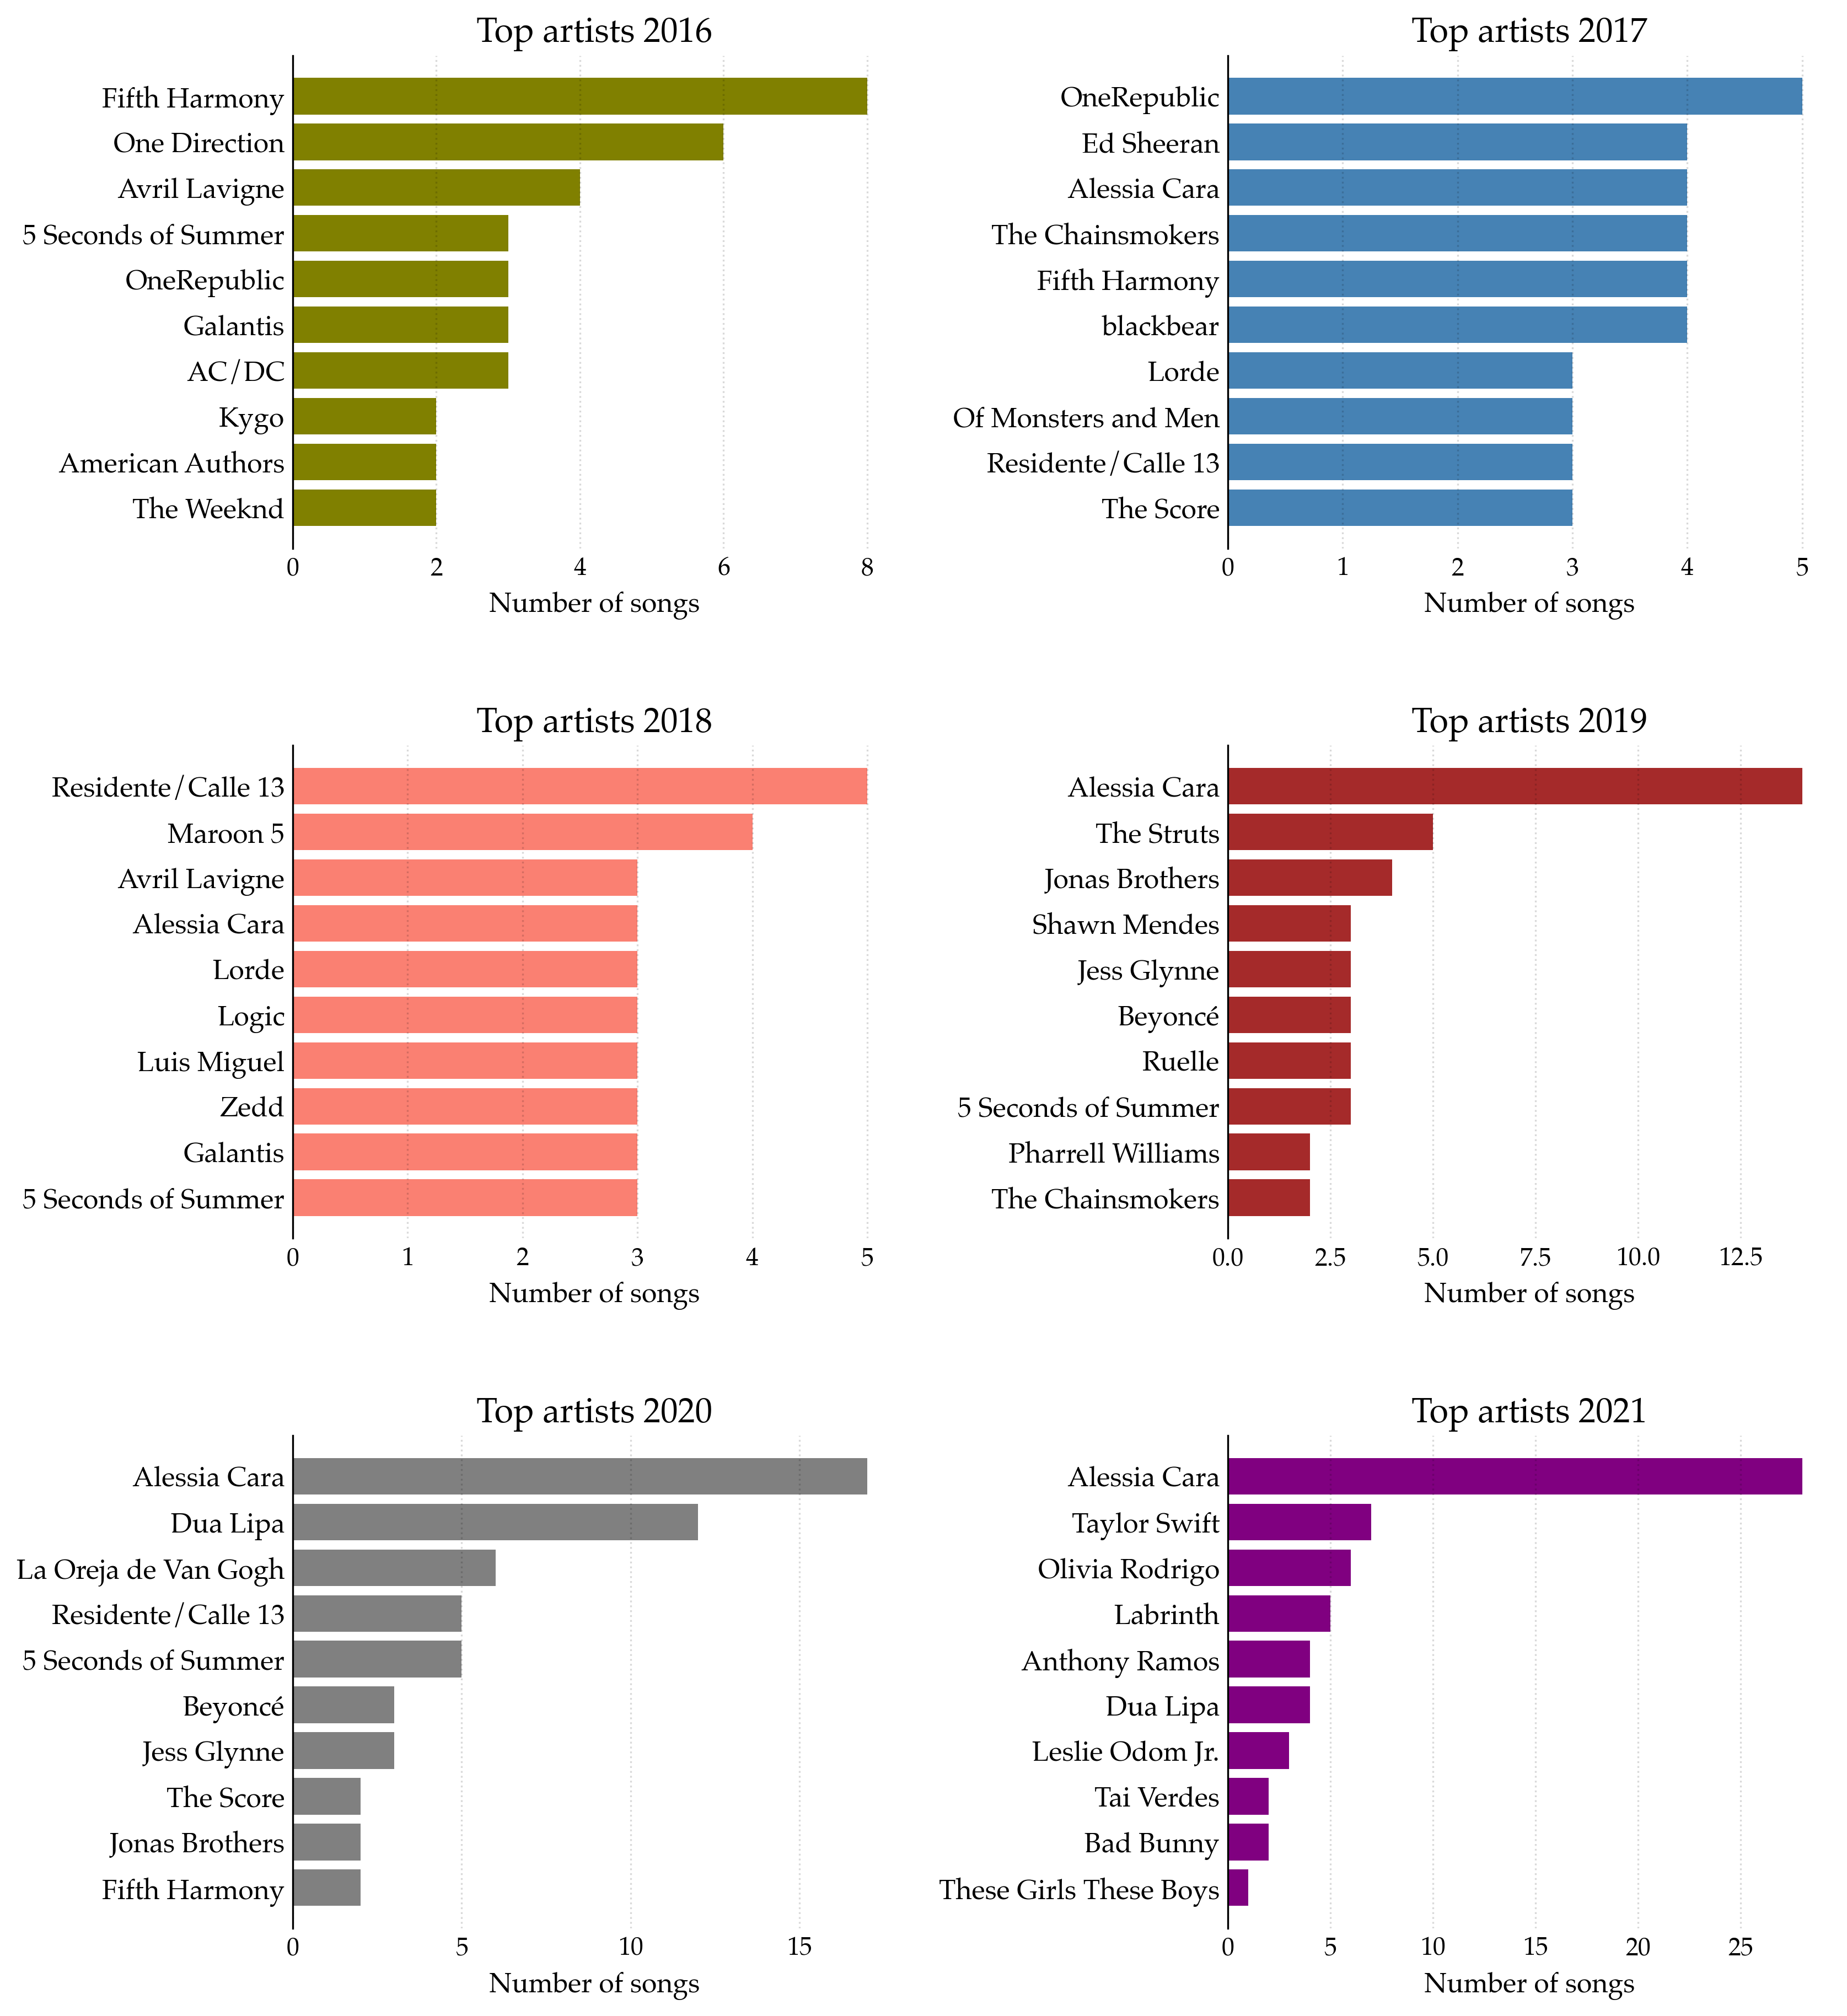

In [16]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,15), sharex=False, dpi=300)
fig.subplots_adjust(wspace=0.55, hspace=0.4)


ax1.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2016'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2016'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'olive',
        )
ax2.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2017'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2017'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'steelblue',
        )
ax3.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2018'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2018'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'salmon',
        )
ax4.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2019'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2019'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'brown',
        )
ax5.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2020'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2020'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'gray',
        )
ax6.barh(y=df_top_artists.query("playlist_year == 'Top Songs 2021'").sort_values('number_songs', ascending=True)['artist_name'],
         width= df_top_artists.query("playlist_year == 'Top Songs 2021'").sort_values('number_songs', ascending=True)['number_songs'],
         linewidth=0, color = 'purple',
        )

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', length=0)
ax1.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax1.set_title("Top artists 2016", size=15)
ax1.set_xlabel("Number of songs", size=12)
ax1.tick_params(axis='x', labelsize=11)
ax1.tick_params(axis='y', labelsize=12)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', length=0)
ax2.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax2.set_title("Top artists 2017", size=15)
ax2.set_xlabel("Number of songs", size=12)
ax2.tick_params(axis='x', labelsize=11)
ax2.tick_params(axis='y', labelsize=12)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='both', length=0)
ax3.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax3.set_title("Top artists 2018", size=15)
ax3.set_xlabel("Number of songs", size=12)
ax3.tick_params(axis='x', labelsize=11)
ax3.tick_params(axis='y', labelsize=12)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(axis='both', length=0)
ax4.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax4.set_title("Top artists 2019", size=15)
ax4.set_xlabel("Number of songs", size=12)
ax4.tick_params(axis='x', labelsize=11)
ax4.tick_params(axis='y', labelsize=12)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.tick_params(axis='both', length=0)
ax5.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax5.set_title("Top artists 2020", size=15)
ax5.set_xlabel("Number of songs", size=12)
ax5.tick_params(axis='x', labelsize=11)
ax5.tick_params(axis='y', labelsize=12)

ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.tick_params(axis='both', length=0)
ax6.grid(visible=True, axis='x', ls=':', color='black', alpha=0.15)
ax6.set_title("Top artists 2021", size=15)
ax6.set_xlabel("Number of songs", size=12)
ax6.tick_params(axis='x', labelsize=11)
ax6.tick_params(axis='y', labelsize=12)

